In [25]:
import numpy as np
import imageio as io
import scipy
from scipy import stats
from skimage import color
from skimage import filters
import matplotlib.pyplot as plt

In [17]:
def normalize(matrix, start, end):
    return (matrix - matrix.min())/(matrix.max() - matrix.min()) * (end-start) + start

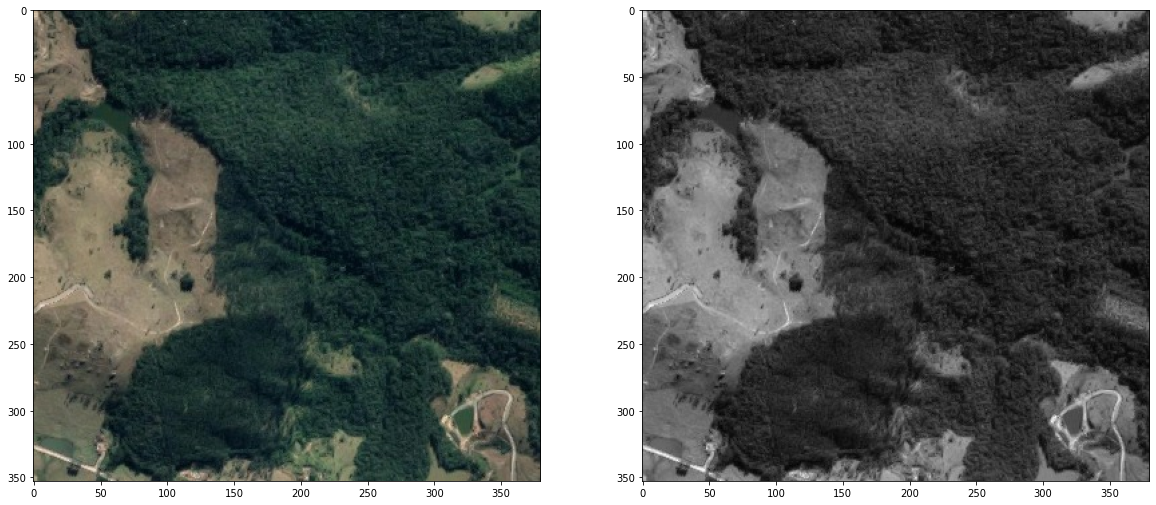

In [104]:
# reference_name = 'montreal-bg.jpg'
reference_name = 'floresta.jpeg'

img_orig = ref_image = io.imread(reference_name)
img_orig_gs = color.rgb2gray(img_orig)
img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img_orig)
plt.subplot(122)
plt.imshow(img_orig_gs, cmap='gray')

<BarContainer object of 256 artists>

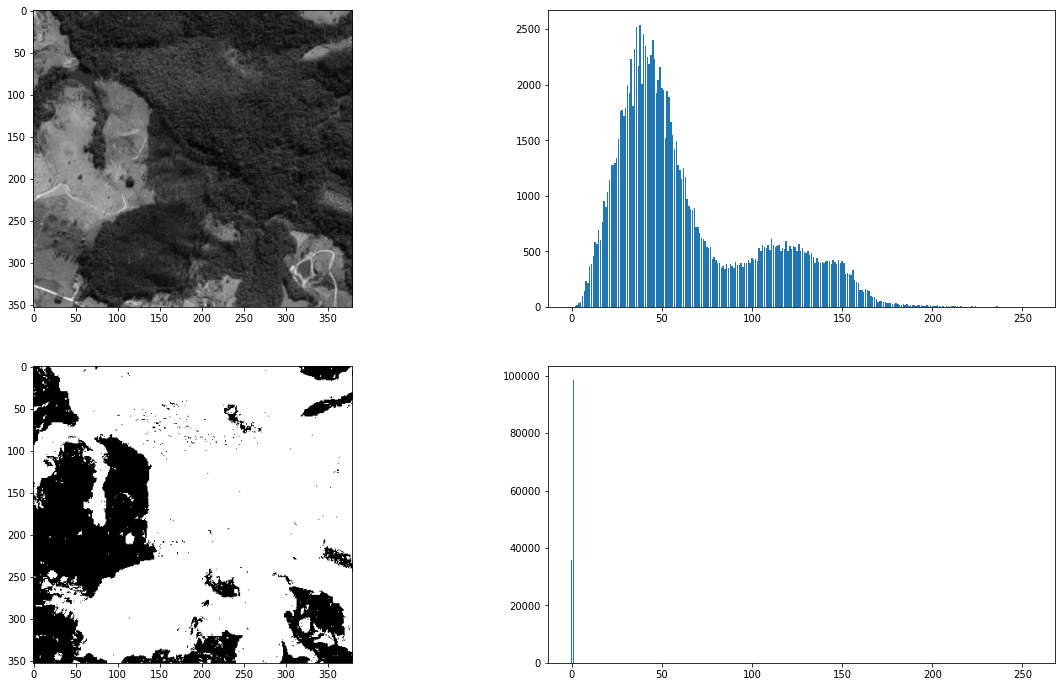

In [105]:

# 1. Compute histogram
hist, _ = np.histogram(img_orig_gs, bins=256, range=(0,256))

# 2. Compute threshold
ths = filters.threshold_otsu(img_orig_gs)
img_ths = img_orig_gs < ths
hist_ths, _ = np.histogram(img_ths, bins=256, range=(0,256))


plt.figure(figsize=(20, 12))
plt.subplot(221); plt.imshow(img_orig_gs, cmap='gray')
plt.subplot(222); plt.bar(np.arange(0,256), hist)

plt.subplot(223); plt.imshow(img_ths, cmap='gray')
plt.subplot(224); plt.bar(np.arange(0,256), hist_ths)


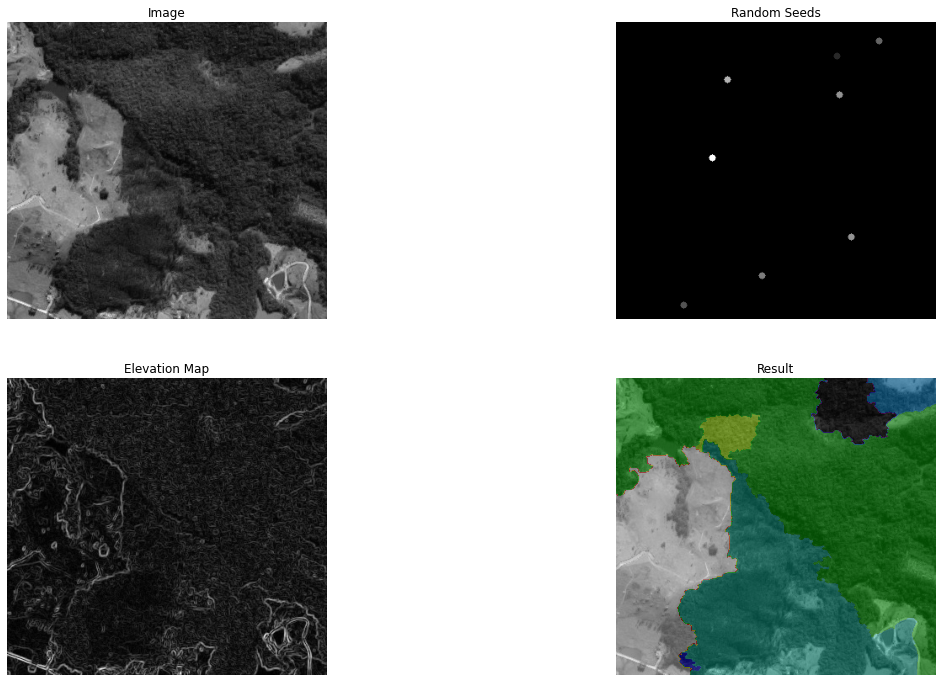

In [114]:
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import morphology


no_seeds = 8
random_seeds = np.zeros(img_orig_gs.shape)

indices = np.random.randint(0, img_orig_gs.shape, [no_seeds, 2])


random_seeds[indices[:, 0], indices[:, 1]] = img_orig_gs[indices[:, 0], indices[:, 1]]

random_seeds = morphology.dilation(random_seeds, morphology.disk(4)).astype(np.uint8) 

elevation_map = sobel(img_orig_gs)
segmentation = watershed(elevation_map, random_seeds)
# segmentation = normalize(segmentation, 0, 255).astype(np.uint8)
# print(segmentation)

elev_ths, _ = np.histogram(elevation_map, bins=256, range=(0,256))
seg_ths, _ = np.histogram(segmentation, bins=256, range=(0,256))
rand_ths, _ = np.histogram(random_seeds, bins=256, range=(0,256))

fig, axes = plt.subplots(2,2, figsize=(20, 12), sharex=True, sharey=True)
ax = axes.ravel()


axes[0, 0].imshow(img_orig_gs, cmap='gray'); axes[0, 0].axis('off'); axes[0,0].set_title('Image')
# axes[0, 1].bar(np.arange(0,256), hist)

axes[0, 1].imshow(random_seeds, cmap='gray'); axes[0, 1].axis('off'); axes[0,1].set_title('Random Seeds')
# axes[1, 1].bar(np.arange(0,256), hist)

axes[1, 0].imshow(elevation_map, cmap='gray'); axes[1, 0].axis('off'); axes[1,0].set_title('Elevation Map')
# axes[2, 1].bar(np.arange(0,256), elev_ths)

axes[1, 1].imshow(img_orig_gs, cmap='gray'); axes[1, 1].axis('off'); axes[1,1].set_title('Result')
axes[1, 1].imshow(segmentation, cmap=plt.cm.nipy_spectral, alpha=0.4)